In [1]:
import os
import glob
from IPython.display import Image,display

In [2]:
!nvidia-smi


Fri May 23 13:26:24 2025       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 457.34       Driver Version: 457.34       CUDA Version: 11.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name            TCC/WDDM | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  GeForce GTX 1650   WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   53C    P8     4W /  N/A |    134MiB /  4096MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
HOME = "/content/"
HOME

'/content/'

In [ ]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics 8.3.133 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 38.8/107.7 GB disk)


In [ ]:
!mkdir {HOME}/datasets

In [ ]:
%cd {HOME}/datasets

/content/datasets


In [4]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="wAqI41K354fhKZzzM8PM")
project = rf.workspace("roboflow-100").project("road-signs-6ih4y")
version = project.version(2)
dataset = version.download("yolov5")


   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   -- ------------------------------------- 2.1/38.8 MB 13.1 MB/s eta 0:00:03
   ----- ---------------------------------- 5.0/38.8 MB 13.1 MB/s eta 0:00:03
   -------- ------------------------------- 7.9/38.8 MB 13.2 MB/s eta 0:00:03
   ----------- ---------------------------- 10.7/38.8 MB 13.2 MB/s eta 0:00:03
   ------------- -------------------------- 13.4/38.8 MB 13.1 MB/s eta 0:00:02
   ---------------- ----------------------- 16.3/38.8 MB 13.0 MB/s eta 0:00:02
   ------------------- -------------------- 18.9/38.8 MB 13.0 MB/s eta 0:00:02
   ---------------------- ----------------- 21.5/38.8 MB 12.9 MB/s eta 0:00:02
   ------------------------- -------------- 24.4/38.8 MB 13.0 MB/s eta 0:00:02
   --------------------------- ------------ 27.0/38.8 MB 13.0 MB/s eta 0:00:01
   ------------------------------ --------- 29.9/38.8 MB 13.0 MB/s eta 0:00:01
   --------------------------------- ------ 32.5/38.8 MB 13.1 MB


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: C:\Users\Acer\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to road-signs-2 in yolov5pytorch:: 100%|██████████| 4198/4198 [00:03<00:00, 1362.94it/s]


In [1]:
# !ls -R /content/datasets/road-signs-2


ls: cannot access '/content/datasets/road-signs-2': No such file or directory


In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=100 imgsz=640


/content
Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/datasets/road-signs-2/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True

In [ ]:
!ls {HOME}/runs/detect/train2/

args.yaml			 R_curve.png	      train_batch7742.jpg
confusion_matrix_normalized.png  results.csv	      val_batch0_labels.jpg
confusion_matrix.png		 results.png	      val_batch0_pred.jpg
F1_curve.png			 train_batch0.jpg     val_batch1_labels.jpg
labels_correlogram.jpg		 train_batch1.jpg     val_batch1_pred.jpg
labels.jpg			 train_batch2.jpg     val_batch2_labels.jpg
P_curve.png			 train_batch7740.jpg  val_batch2_pred.jpg
PR_curve.png			 train_batch7741.jpg  weights


In [ ]:
from IPython.display import Image

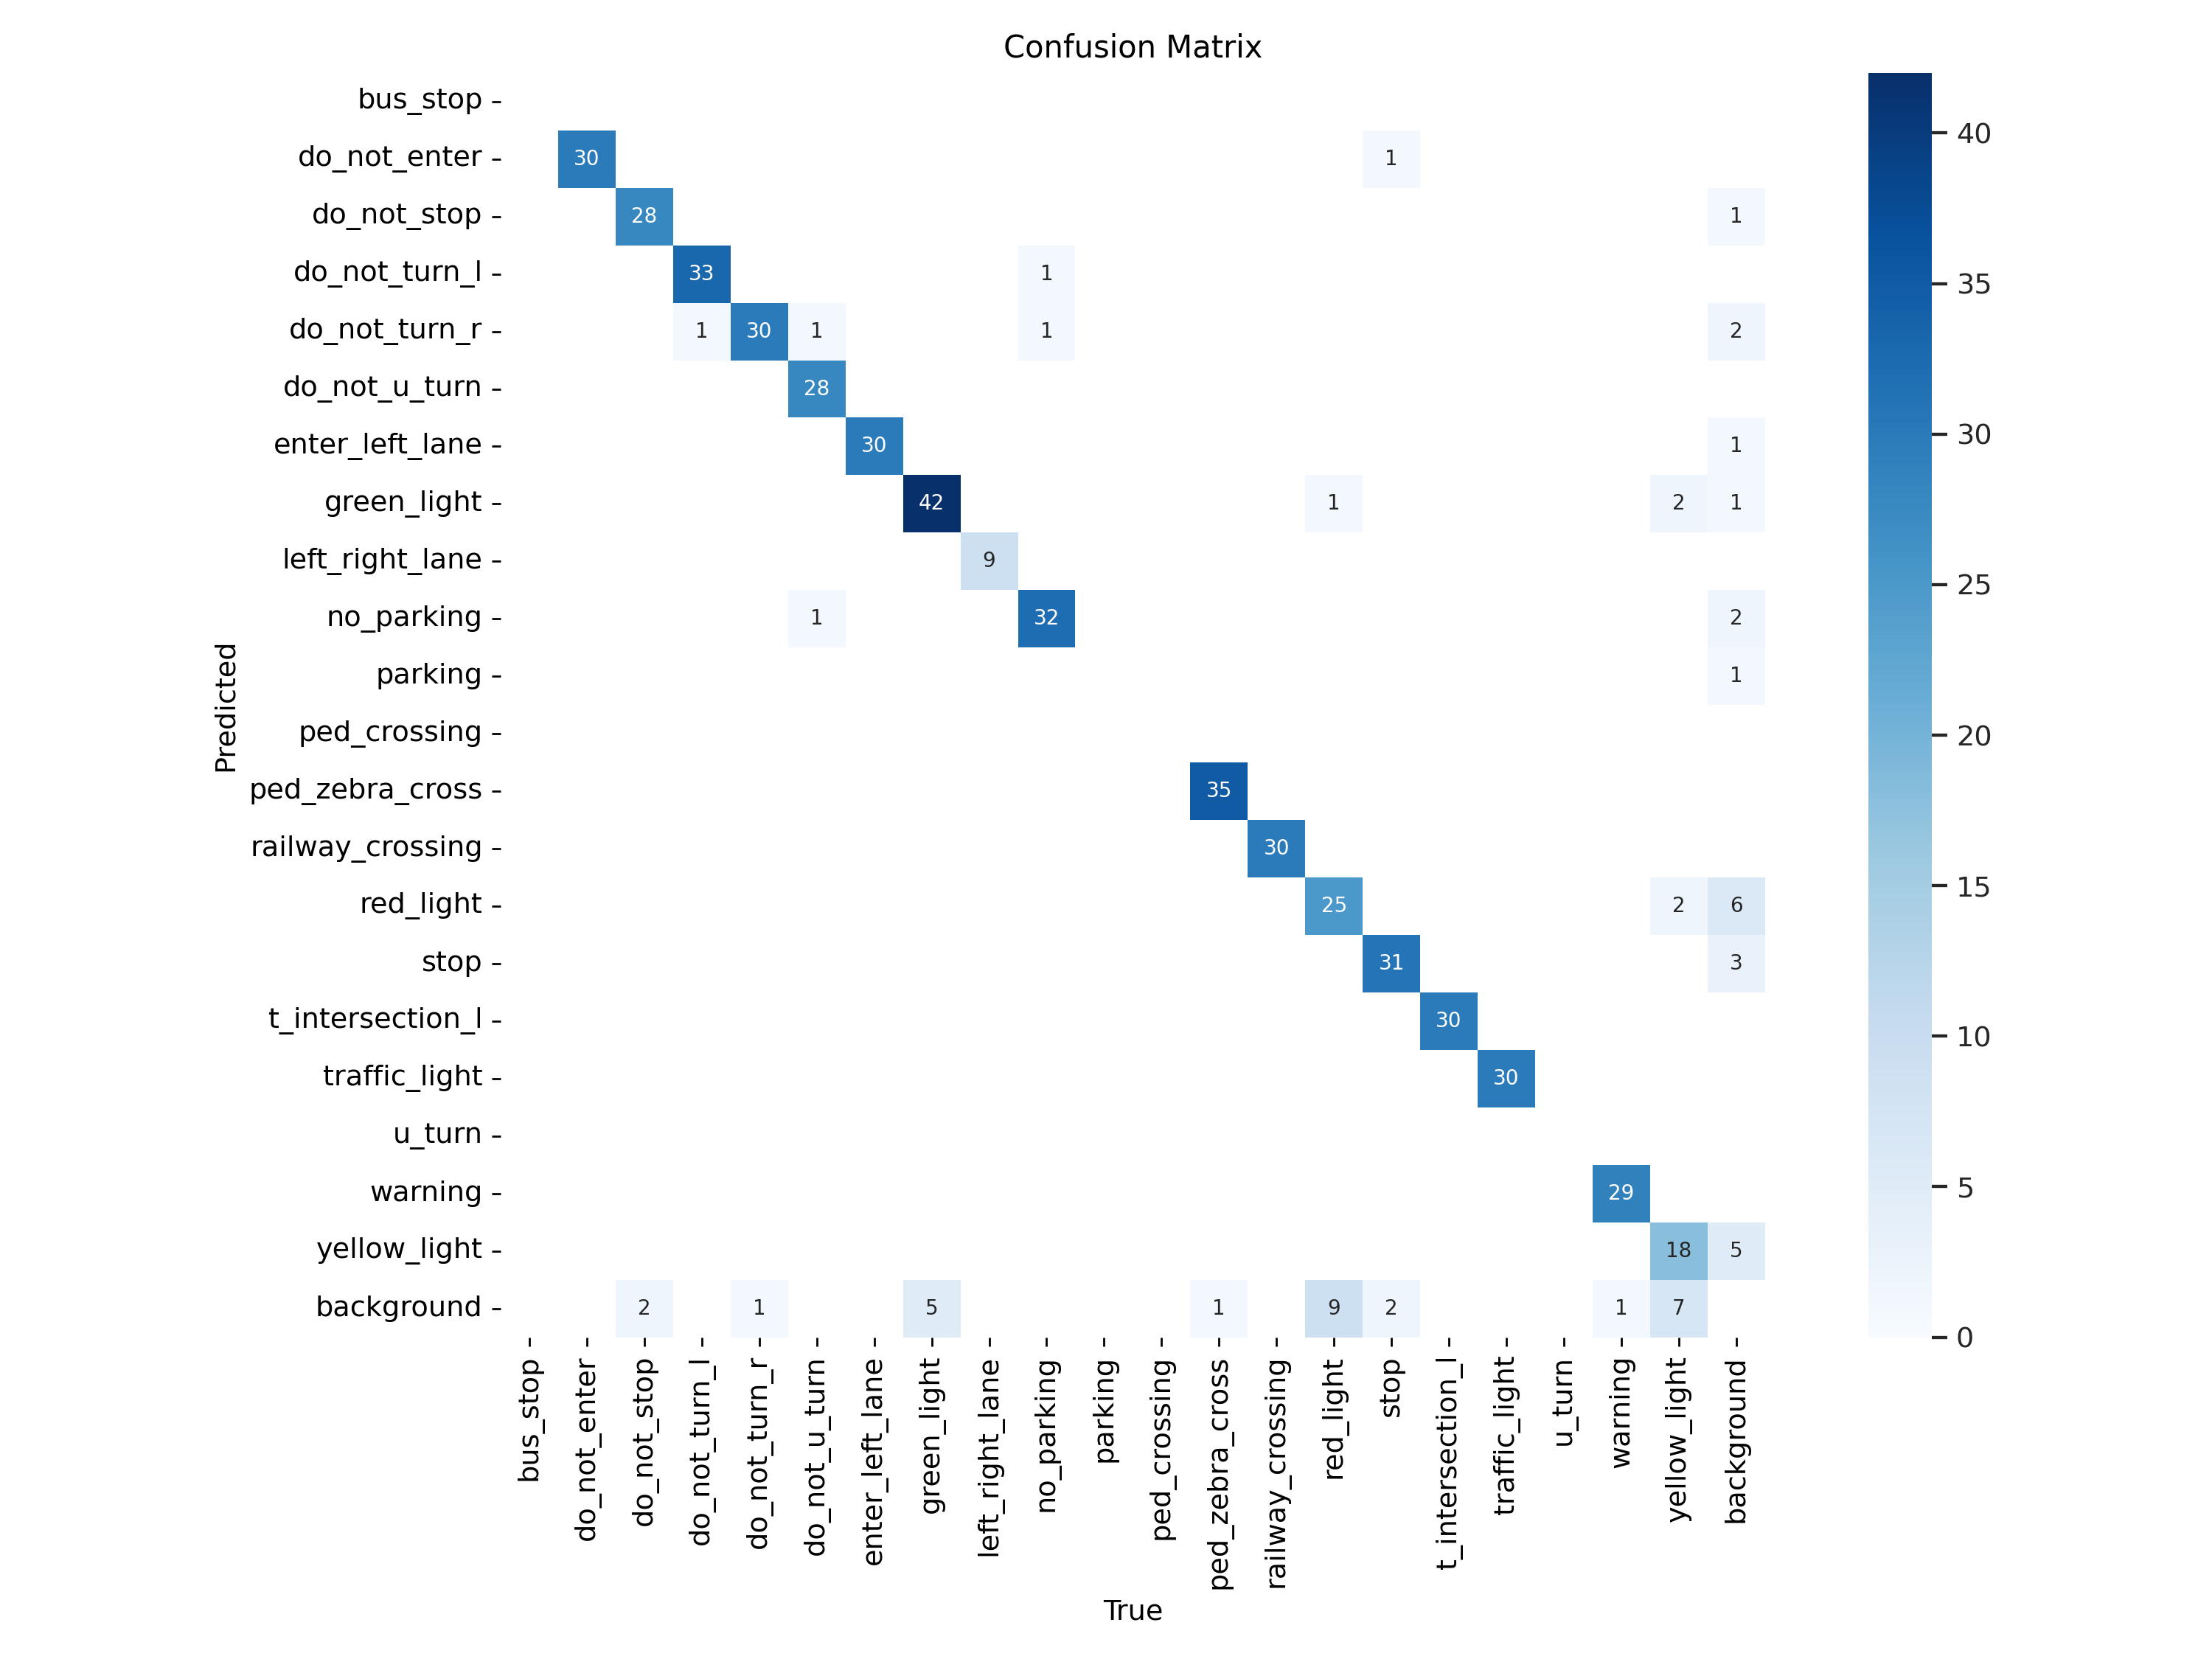

In [ ]:
Image(filename= f"{HOME}/runs/detect/train2/confusion_matrix.png")

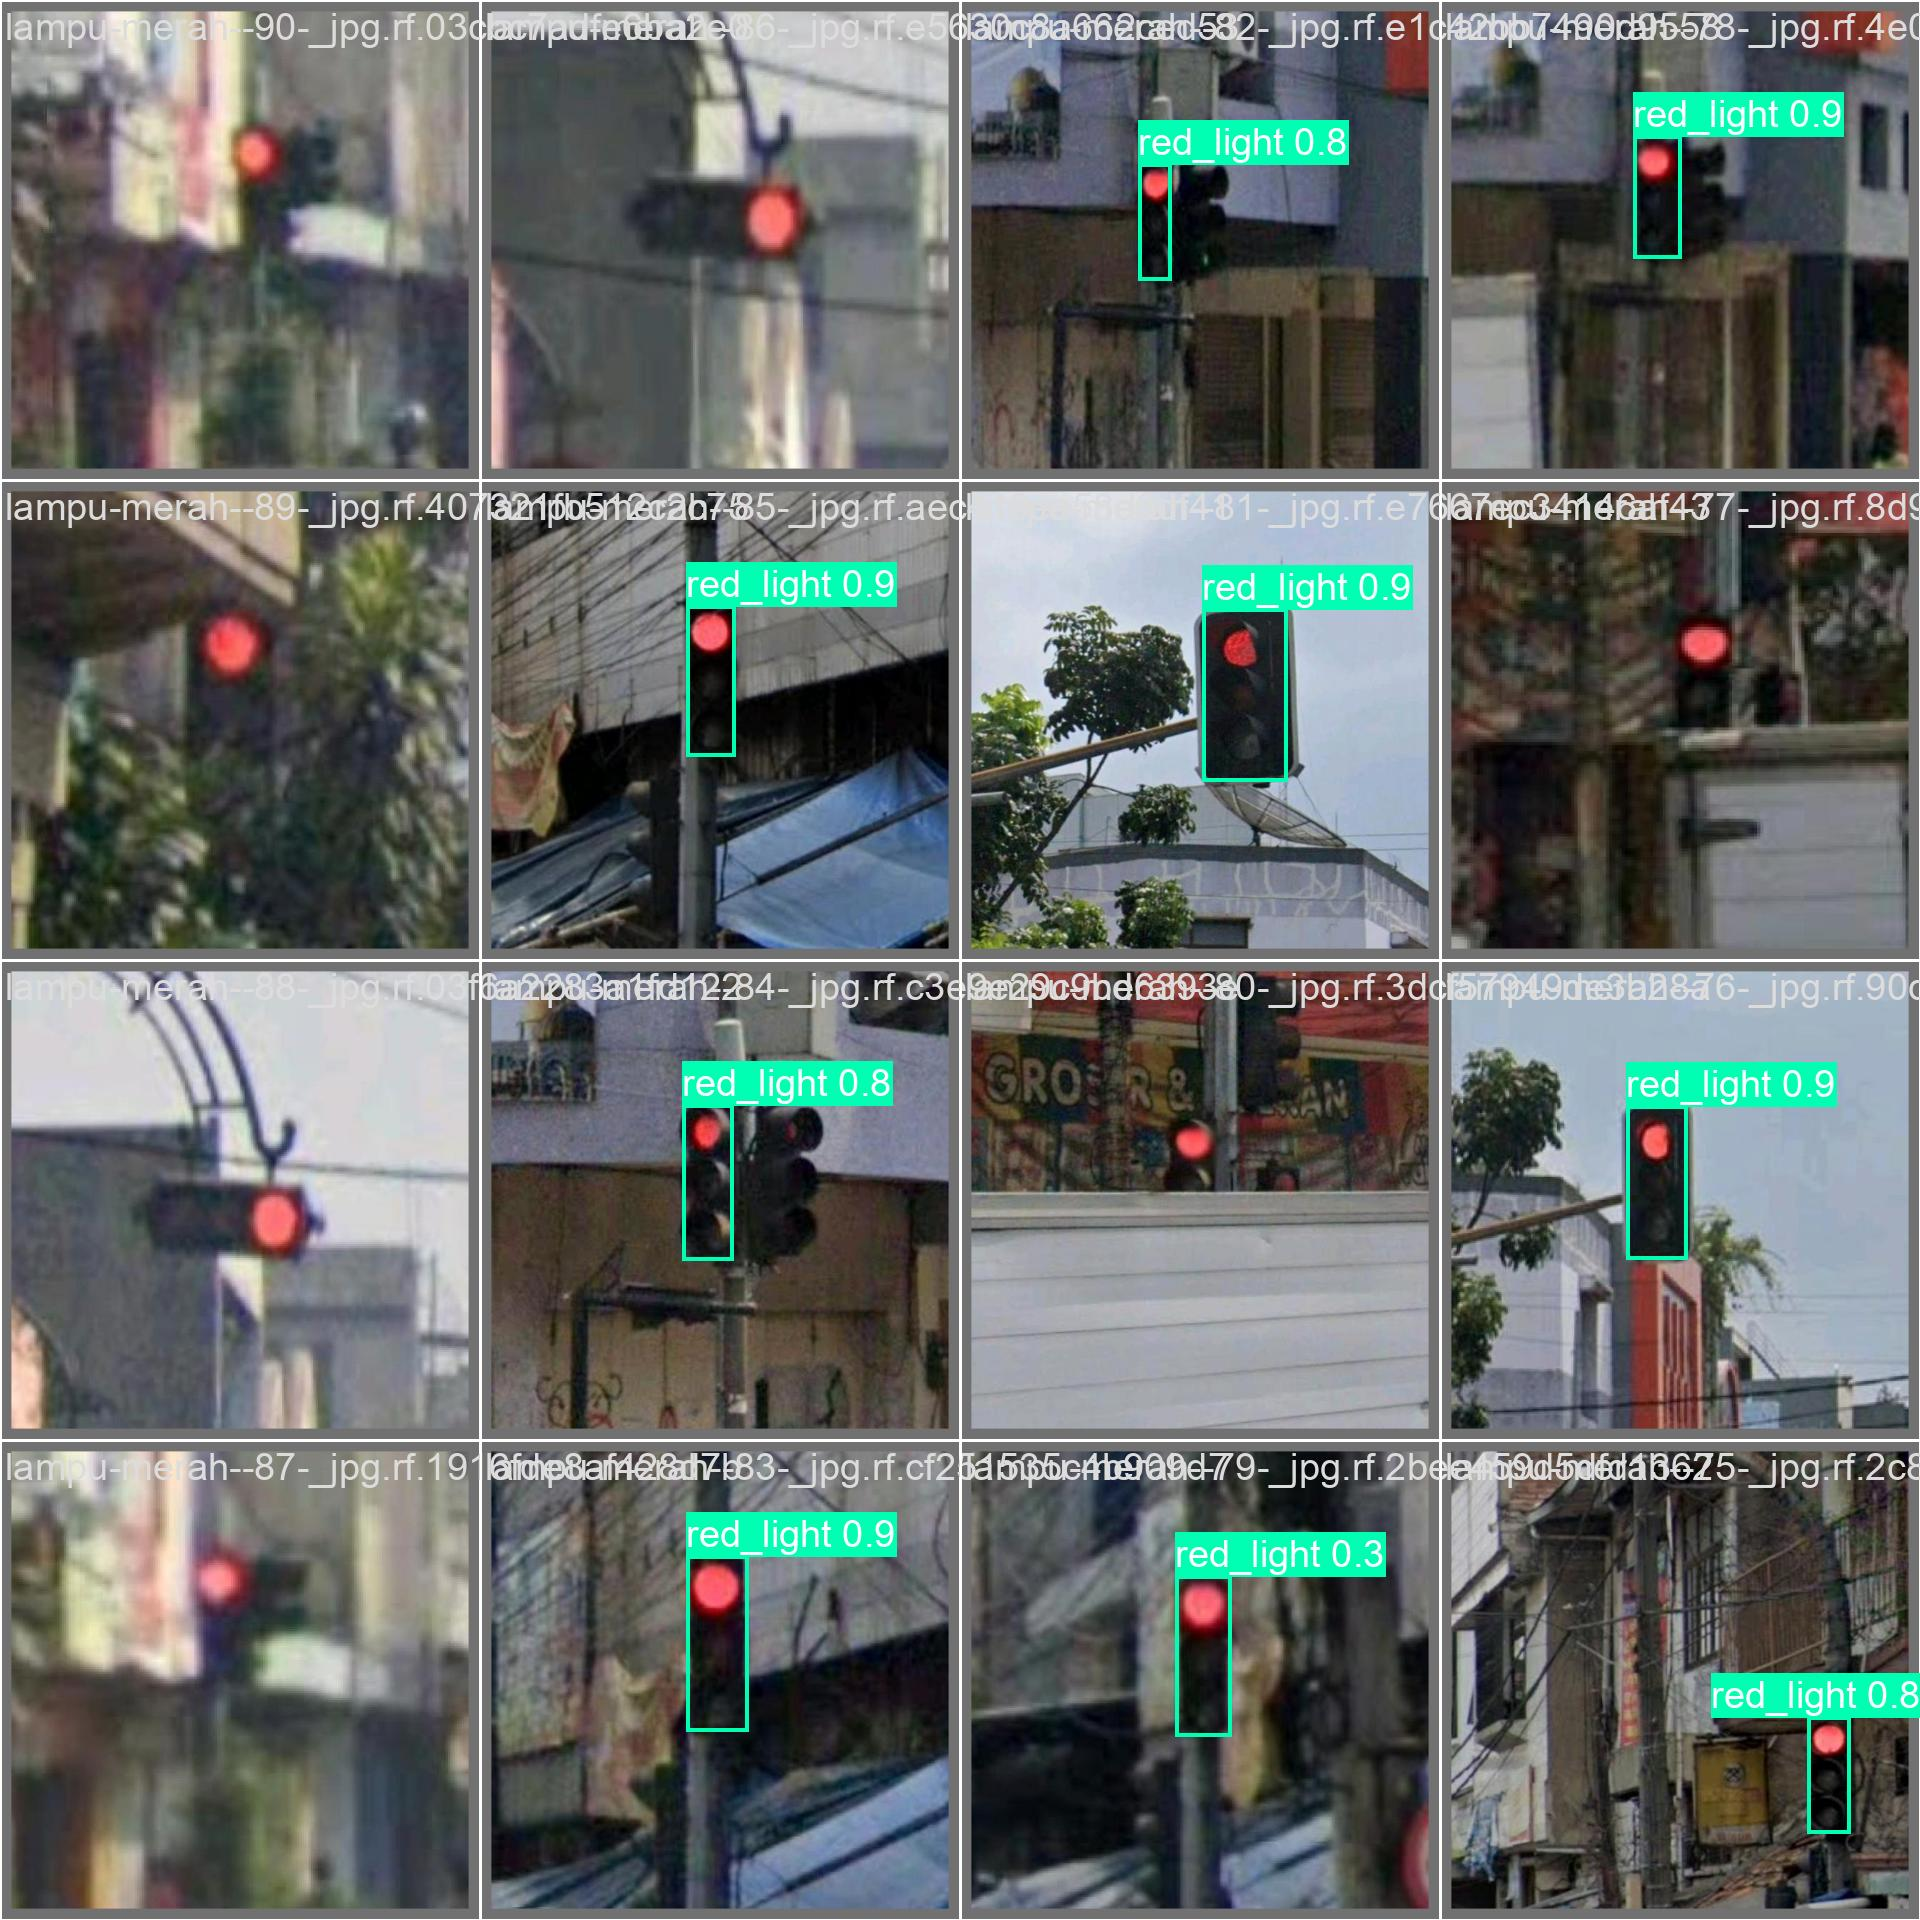

In [ ]:
Image(filename= f"{HOME}/runs/detect/train2/val_batch2_pred.jpg")

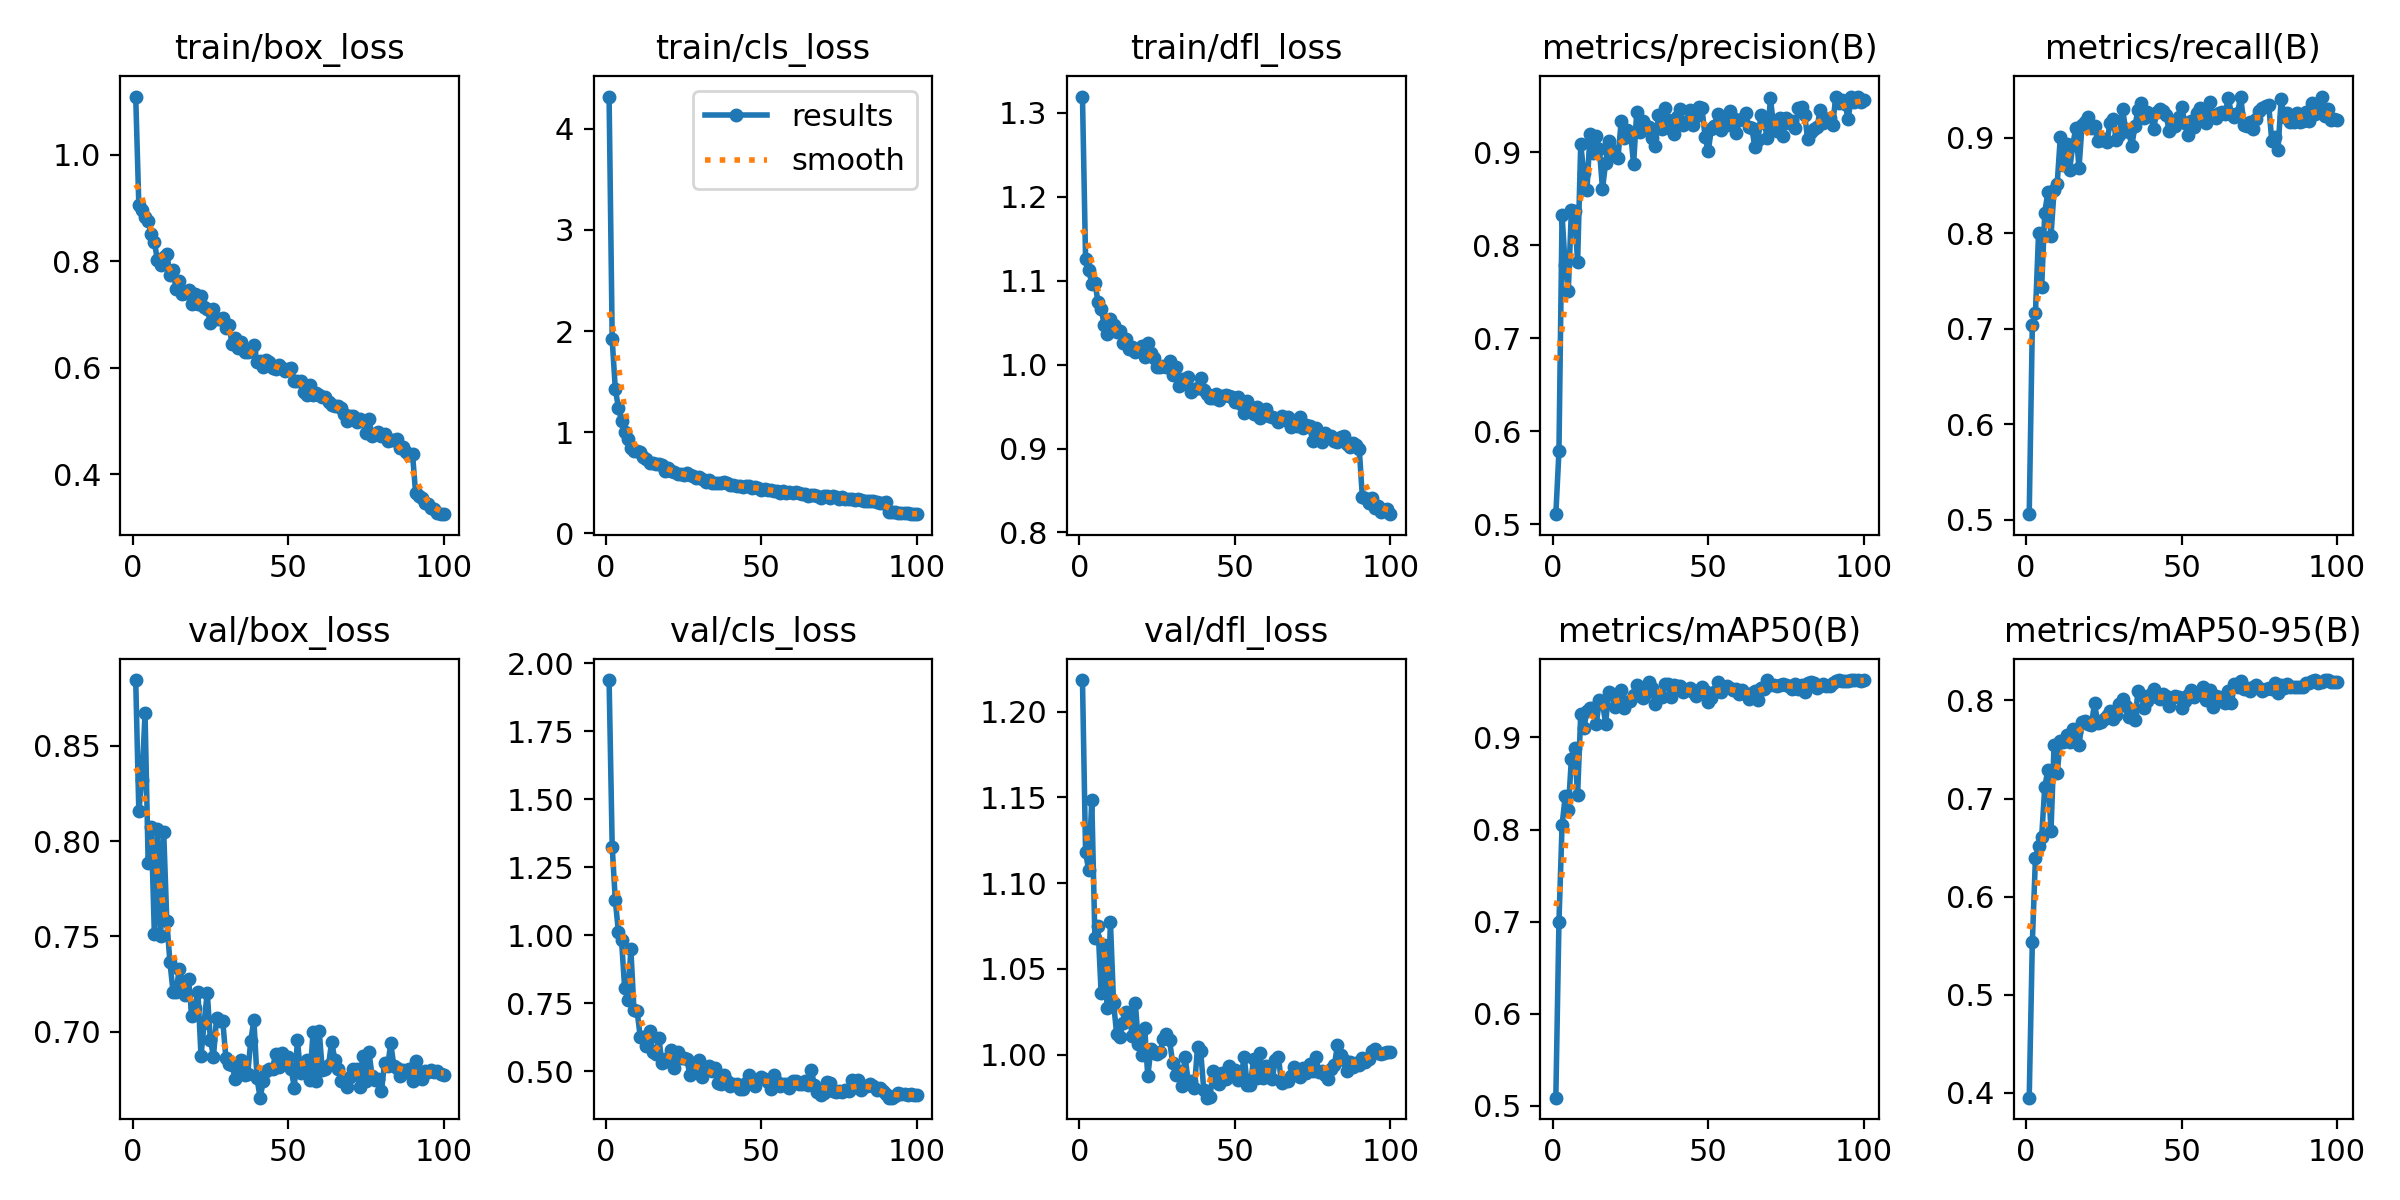

In [ ]:
Image(filename= f"{HOME}/runs/detect/train2/results.png")

In [ ]:
!yolo task=detect mode=val model="{HOME}/runs/detect/train2/weights/best.pt" data="{dataset.location}/data.yaml"


Ultralytics 8.3.133 🚀 Python-3.11.12 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,133,711 parameters, 0 gradients, 28.5 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1457.2±645.9 MB/s, size: 40.5 KB)
val: Scanning /content/datasets/road-signs-2/valid/labels.cache... 488 images, 0 backgrounds, 0 corrupt: 100% 488/488 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 31/31 [00:07<00:00,  4.12it/s]
                   all        488        529      0.954       0.93      0.962       0.82
          do_not_enter         30         30       0.98          1      0.995      0.937
           do_not_stop         30         30      0.965      0.928      0.973      0.906
         do_not_turn_l         30         34      0.971      0.985      0.994      0.897
         do_not_turn_r         30         31      0.903      0.968      0.981      0.923
         do_not_u_turn         30         30 

In [ ]:
pre_dir = "/content/best.pt"

In [ ]:
!yolo mode=predict task=detect model=/content/best.pt conf=0.25 source=/content/stop1.jpg

Ultralytics 8.3.133 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (Intel Xeon 2.20GHz)
Model summary (fused): 72 layers, 11,133,711 parameters, 0 gradients, 28.5 GFLOPs

image 1/1 /content/stop1.jpg: 384x640 1 stop, 577.3ms
Speed: 5.7ms preprocess, 577.3ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict


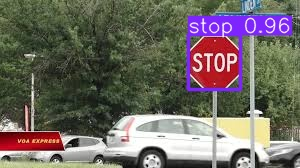

In [ ]:
from IPython.display import Image
Image(filename='/content/runs/detect/predict3/stop1.jpg')
